In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pylab
import seaborn as sns
#plt.style.use('seaborn')
%matplotlib inline
pylab.rcParams['figure.figsize'] = (15, 10)

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Кластеризация или обучение без учителя


## k-Means


### Подготовка данных

Для реализации алгоритма вначале необходимо получить данные с помощью функции [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) библиотеки sklearn:

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=5, centers=4, random_state=21)
X, y

(array([[-8.13662364, -4.81444713,  3.9359552 , -8.21735083, -4.63344305],
        [-6.42268911, -6.20108463,  3.49246328, -8.62177893, -6.63212885],
        [-9.49480613, -2.71346591,  2.9051504 , -1.09377871,  1.7888751 ],
        ...,
        [-9.31503967, -4.80203821,  5.05315616, -4.47198345,  2.63358165],
        [-8.83400659, -4.23418288,  2.84614297, -2.73972074,  2.5464589 ],
        [-9.05640116,  6.35742895, -7.11944391, -7.10158446, -1.34642424]]),
 array([0, 0, 1, 0, 1, 3, 3, 3, 1, 3, 3, 1, 1, 3, 2, 1, 2, 1, 1, 1, 3, 0,
        3, 0, 2, 3, 1, 3, 1, 0, 1, 2, 3, 0, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3,
        0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 1, 2, 2, 2, 3, 1, 3, 3, 1, 3,
        0, 3, 2, 1, 2, 0, 0, 0, 0, 1, 0, 3, 3, 3, 1, 2, 1, 1, 0, 1, 3, 2,
        3, 0, 0, 3, 2, 3, 1, 1, 0, 3, 2, 3, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0,
        3, 3, 2, 1, 3, 3, 0, 1, 2, 2, 3, 0, 2, 1, 0, 2, 0, 3, 0, 2, 2, 1,
        0, 3, 2, 0, 2, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 2, 0, 3, 2, 0, 1, 2,
        0, 3, 0, 

---

Нормализуем полученные данные:

In [4]:
X = (X - X.mean(axis=0))/X.std(axis=0)

---

С целью визуализации данных, запишем их в DataFrame и построим графики:

[]

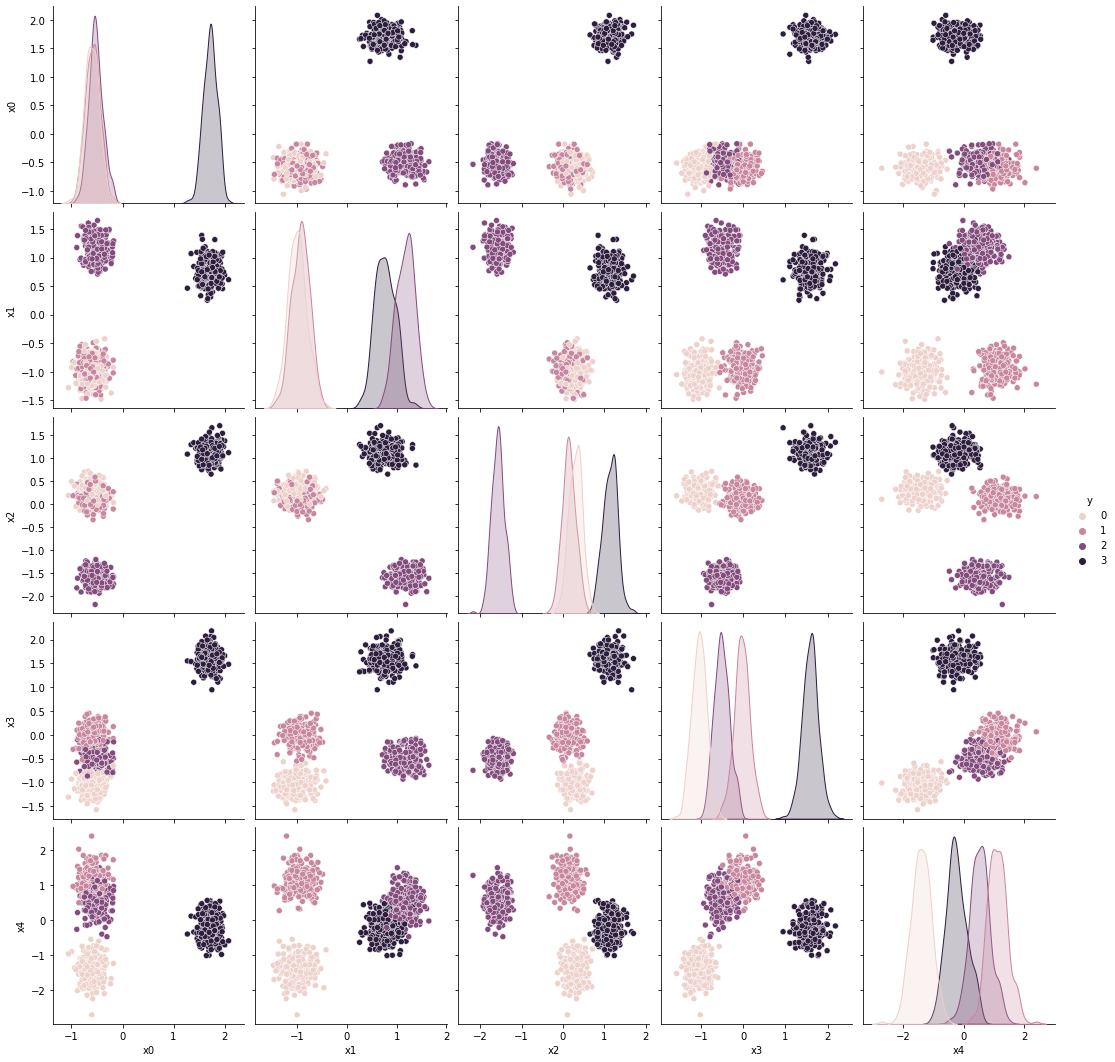

In [5]:
df = pd.DataFrame(X, columns=['x0', 'x1', 'x2', 'x3', 'x4'])
df['y'] = y
sns.pairplot(df, hue="y", height=3)
plt.plot()

Наиболее хорошо кластеры разбиваются по переменным х2 и х4 - именно их мы будем использовать для визуализации на плоскости.

---

Данные готовы. 

### Обучение модели

Импортируем метод [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Метод к-средних требует указать количество формируемых кластеров. Предположим, что мы не знаем количество кластеров, и укажем требование разбить на 2 кластера. Посмотрим на результаты:

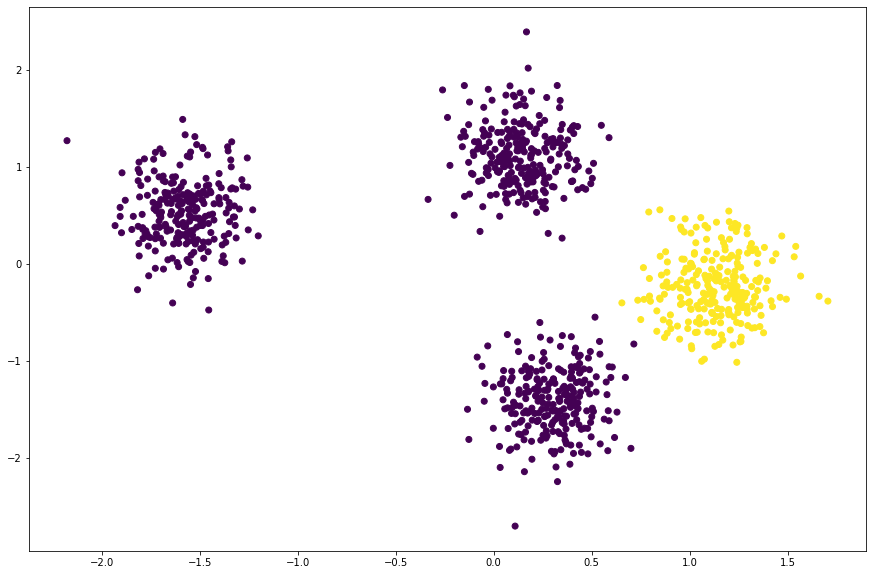

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=21).fit(X)
plt.scatter(X[:,2], X[:,4], c=kmeans.labels_)
plt.show()

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,

In [8]:
X[:,4]

array([-1.00415262e+00, -1.66988939e+00,  1.13503971e+00, -1.76088751e+00,
        1.83863700e+00, -1.69613603e-01, -2.82598660e-02, -5.06777713e-01,
        7.25231128e-01, -6.67124421e-01, -1.44767998e-01,  1.79964715e+00,
        1.46513927e+00, -1.51522695e-01,  8.36398376e-01,  1.15007035e+00,
        4.42948443e-02,  1.39107494e+00,  1.30646324e+00,  1.13379713e+00,
       -2.76281279e-01, -9.13660655e-01,  7.86351152e-02, -1.21430549e+00,
        7.34301616e-01, -8.75147252e-02,  9.23105719e-01, -7.68766212e-02,
        1.19157616e+00, -1.61704134e+00,  1.35271252e+00,  5.04236820e-01,
        1.80531002e-01, -1.58804256e+00, -3.44715845e-01, -1.53796163e+00,
        1.08164698e+00,  1.29179340e+00,  8.30742306e-01, -3.74178731e-01,
       -2.94306301e-01, -1.48763901e+00,  1.18843089e+00, -7.07262805e-01,
       -1.28961228e+00,  3.14448837e-01,  1.11644844e+00,  3.96657726e-01,
       -1.44526746e+00,  1.13449701e+00,  1.47442601e+00,  1.25343658e-01,
        1.15845711e+00,  

---

В результате три кластера были объединены в один.

---

Для определения количества кластеров в данных можно воспользоваться "методом локтя".

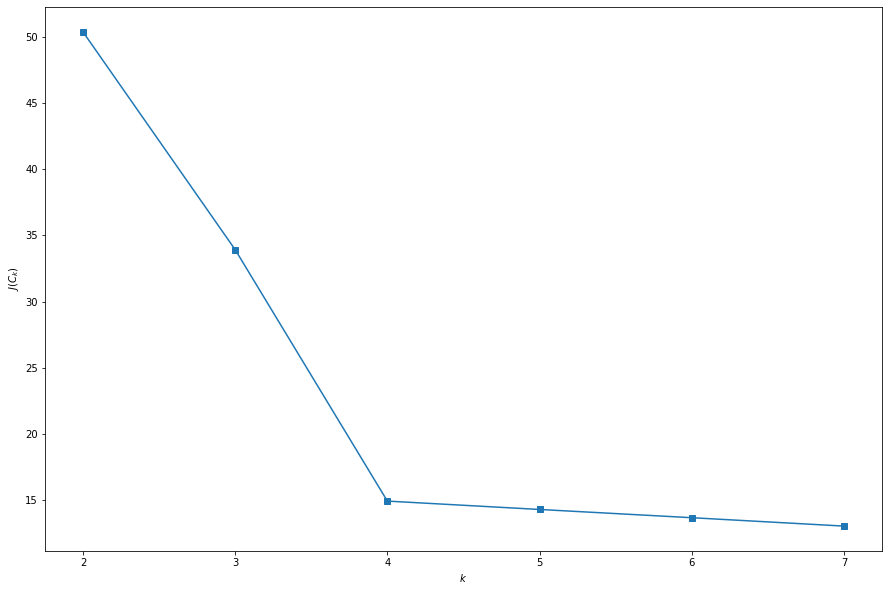

In [9]:
inertia = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=21).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 8), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

---

Методом локтя определили, что требуется 4 кластера:

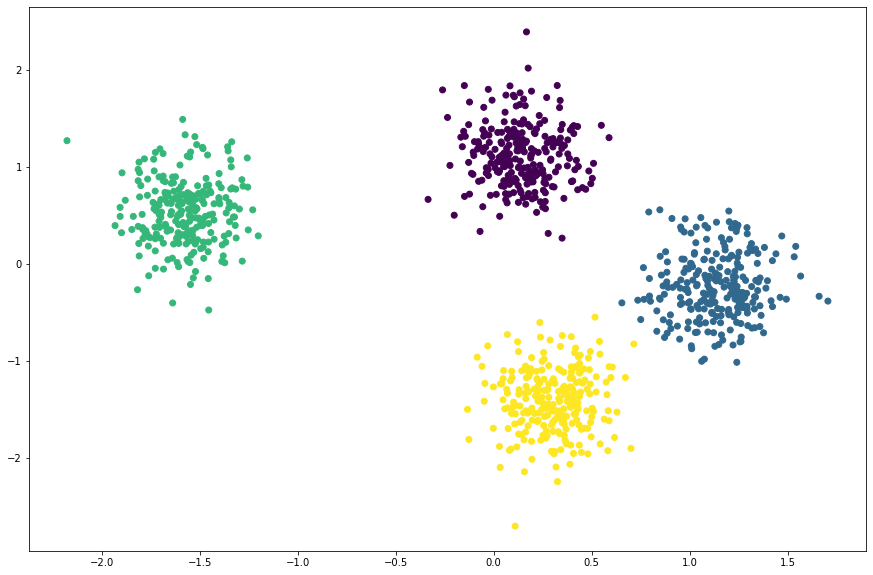

In [10]:
kmeans = KMeans(n_clusters=4, random_state=21).fit(X)
plt.scatter(X[:,2], X[:,4], c=kmeans.labels_)
plt.show()

---

Как оценить качество кластеризации? Если разбиение на кластеры интуитивно понятно или имеются размеченные данные, то можно воспользоваться известными нам Precision, Recall и F-мерой, а в случае сбалансированности кластеров (в каждом кластере примерно одинаковое количество объектов), то можно воспользоваться Accuracy или его аналогом, [индексом Рэнда](https://en.wikipedia.org/wiki/Rand_index) - в библиотеке sklearn [adjusted_rand_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [11]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.labels_)

1.0

---

Индекс Рэнда равен 1 - это значит, что разбиение на кластеры полностью соответствует классам в данных.

---

В случае отсутствия размеченных данных и интуитивного понимания разбиения на кластеры, потребуются иные метрики оценки качества кластеризации.

[silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette_score#sklearn.metrics.silhouette_score) позволяет оценить кластеризацию с точки зрения близости объектов к центройду кластера, к которому принадлежат, и удаленность от кластеров, к которым не принадлежат. Недостатком метрики является то, что она хорошо работает только с кластерами круглой формы.

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_, random_state=21)

0.7886615410756992

---

Близость silhouette_score к 1 говорит об идеальном разбиении на кластеры, к -1 - к идеально плохому разбиению.

Метрику silhouette_score можно применять для определения количества кластеров вместо метода локтя:

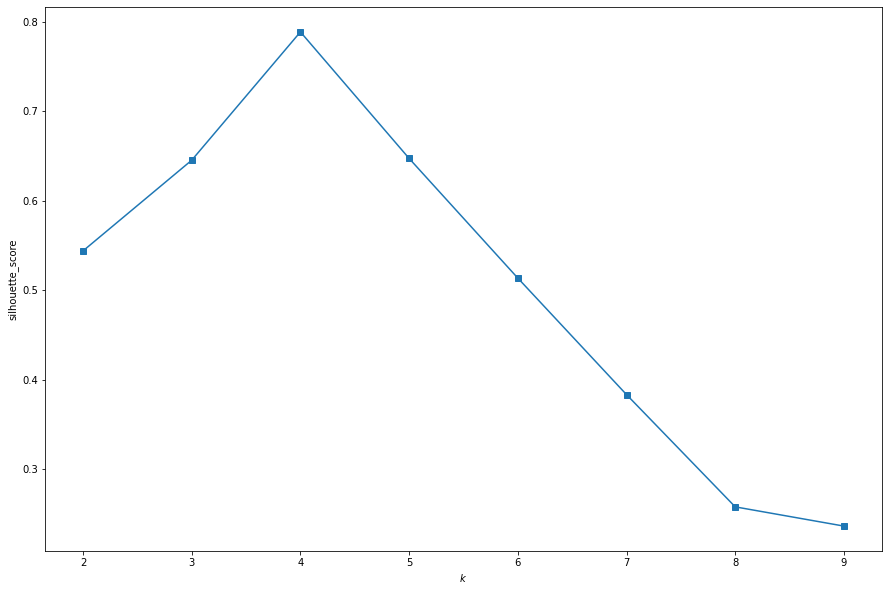

In [13]:
silhouette = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    silhouette.append(silhouette_score(X, km.labels_, random_state=21))

plt.plot(range(2, 10), silhouette, marker='s')
plt.xlabel('$k$')
plt.ylabel('silhouette_score')
plt.show()

---

Максимальное значение silhouette_score на графике показывает, какое количество кластеров необходимо строить.

---

Посторим оптимальное количество кластеров, основываясь на метрике [Калински-Харабаса](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) (Чем больше, там лучше)

7103.301528196654


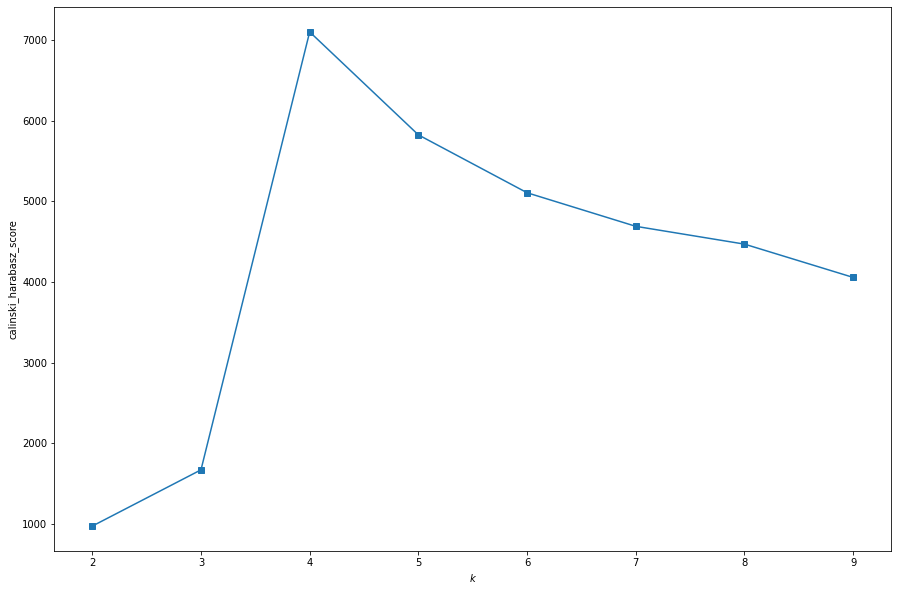

In [14]:
from sklearn.metrics import calinski_harabasz_score

print(calinski_harabasz_score(X, kmeans.labels_))

ch = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    ch.append(calinski_harabasz_score(X, km.labels_))

plt.plot(range(2, 10), ch, marker='s')
plt.xlabel('$k$')
plt.ylabel('calinski_harabasz_score')
plt.show()

---

За счет скорости, метрика calinski_harabasz_score может быть лучшим способом определить количество кластеров.

---

Метрика [davies_bouldin_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html) так же оценивает близость объектов внутри кластера и удаленность от других кластеров. Чем ближе значение метрики к нулю - тем лучше.

0.29772177017394985


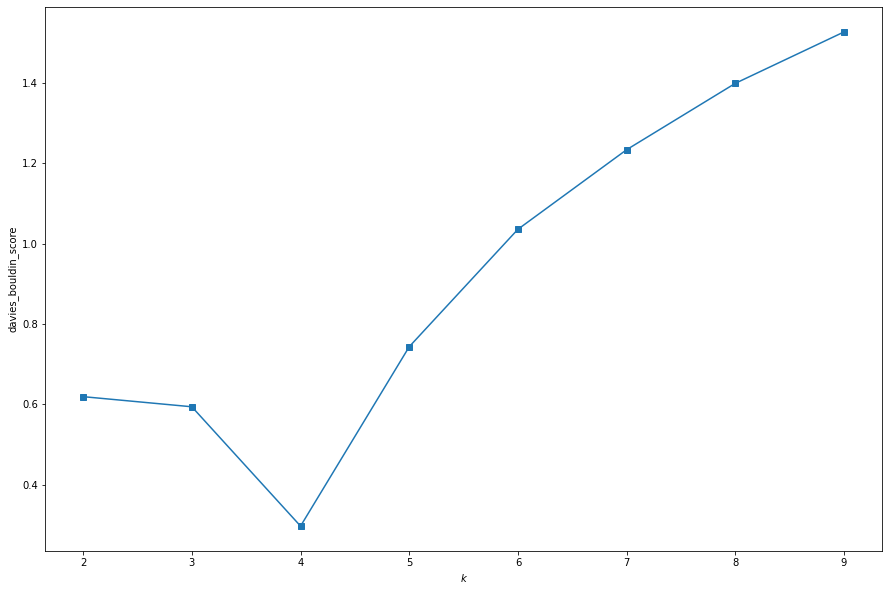

In [15]:
from sklearn.metrics import davies_bouldin_score

print(davies_bouldin_score(X, kmeans.labels_))

db = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=21).fit(X)
    db.append(davies_bouldin_score(X, km.labels_))

plt.plot(range(2, 10), db, marker='s')
plt.xlabel('$k$')
plt.ylabel('davies_bouldin_score')
plt.show()

---

Существуют и другие метрики, но нам для анализа достаточно рассмотренных. Все метрики можно собрать в одну функцию, а их результаты записывать в датафрейм:

In [16]:
def metrics4(X, labels, y):
    result = [adjusted_rand_score(y, labels)]
    result.append(silhouette_score(X, labels, random_state=21))
    result.append(calinski_harabasz_score(X, labels))
    result.append(davies_bouldin_score(X, labels))
    return result

m4 = pd.DataFrame(index = ['adjusted_rand_score', 'silhouette_score', 'calinski_harabasz_score', 
                           'davies_bouldin_score'])
m4['KMeans'] = metrics4(X, kmeans.labels_, y)
m4

,KMeans
adjusted_rand_score,1.000000
silhouette_score,0.788662
calinski_harabasz_score,7103.301528
davies_bouldin_score,0.297722


---

## Агломеративный метод


In [17]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

---

Напишем функцию подготовки данных и визуализации дендрограммы и обучим модель кластеризации агломеротивным методом:

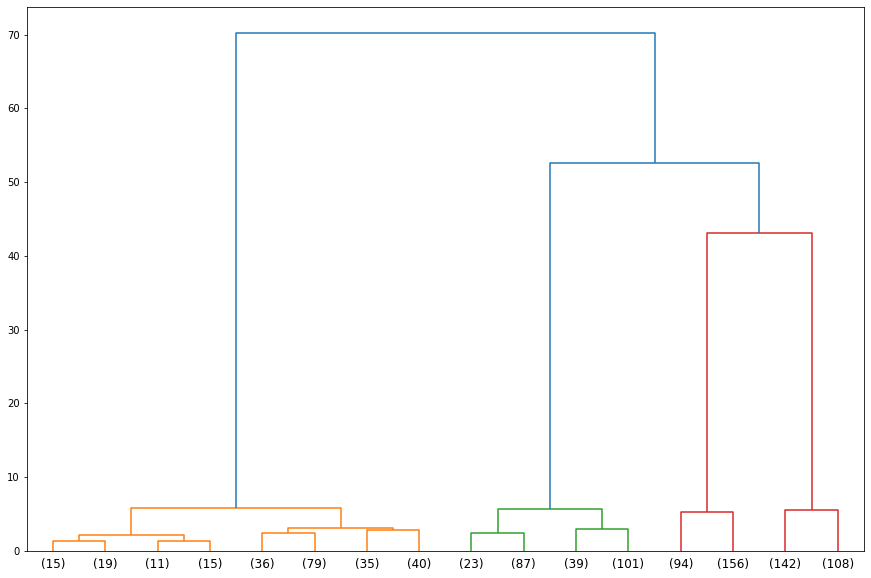

In [18]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    hierarchy.dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
plot_dendrogram(model, truncate_mode='level', p=3)

---

Количество кластеров в данных можно определить на основе дендрограммы - большие расстояния между кластерами и их объединением (ось ординат) свидетельствуют о различных кластерах. Анализируя полученную дендрограмму можно сделать вывод о наличии четырех кластеров.

Обучим модель непосредственно для 4 кластеров и оценим качество кластеризации:

In [19]:
model_2 = AgglomerativeClustering(n_clusters=4).fit(X)
print(classification_report(y, model_2.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       1.00      1.00      1.00       250
           2       1.00      1.00      1.00       250
           3       0.00      0.00      0.00       250

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



---

Анализ показывает, что мы угадали только 50% объектов, при этом в первом и четвертом классе мы не угадали верно ни одного объекта. 

Посмотрим визуализацию кластеризации:

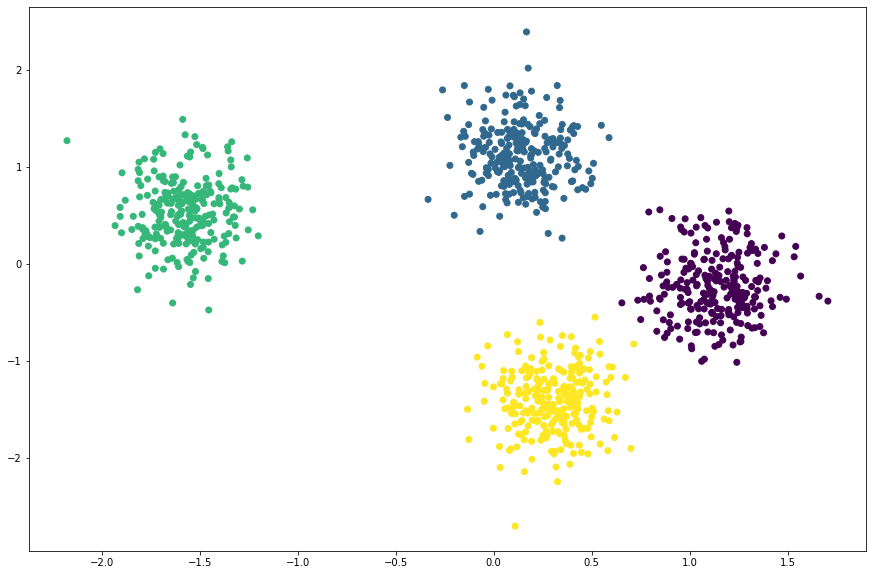

In [20]:
plt.scatter(X[:,2], X[:,4], c=model_2.labels_)
plt.show()

---

Визуальный анализ показывает, что все кластеры были верно предсказаны. Следовательно проблема в том, что метод просто нумерует кластеры не в той последовательности, что заложена изначально. Проверим это:

In [21]:
for j in range(model_2.labels_.max()+1):
    print('метка класса =', j, '   метка кластера =', model_2.labels_[y==j].mean(), 
          '   стандартное отклонение меток кластера =', model_2.labels_[y==j].std())

метка класса = 0    метка кластера = 3.0    стандартное отклонение меток кластера = 0.0
метка класса = 1    метка кластера = 1.0    стандартное отклонение меток кластера = 0.0
метка класса = 2    метка кластера = 2.0    стандартное отклонение меток кластера = 0.0
метка класса = 3    метка кластера = 0.0    стандартное отклонение меток кластера = 0.0


---

Получается, что классу с меткой 0 соответствует кластер с меткой 3 и наоборот. Для дальнейшей оценки качества кластеризаци создадим вектор меток классов y_ac, соответствующий результатам кластеризации:

In [22]:
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(4):
     y_ac[y == j] = round(model_2.labels_[y==j].mean(), 0)
print(classification_report(y_ac, model_2.labels_))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       250
         1.0       1.00      1.00      1.00       250
         2.0       1.00      1.00      1.00       250
         3.0       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



---

100% объектов классов угаданы при кластеризации.

Подсчитаем и запишем в таблицу метрики качества кластеризации:

In [23]:
m4['AgglomerativeClustering'] = metrics4(X, model_2.labels_, y_ac)
m4

,KMeans,AgglomerativeClustering
adjusted_rand_score,1.000000,1.000000
silhouette_score,0.788662,0.788662
calinski_harabasz_score,7103.301528,7103.301528
davies_bouldin_score,0.297722,0.297722


## Метод главных компонент


---

Импортируем метод PCA и обучим модель для 5 главных компонент:

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

---

Визуализируем накопленную сохраненную димперсию:

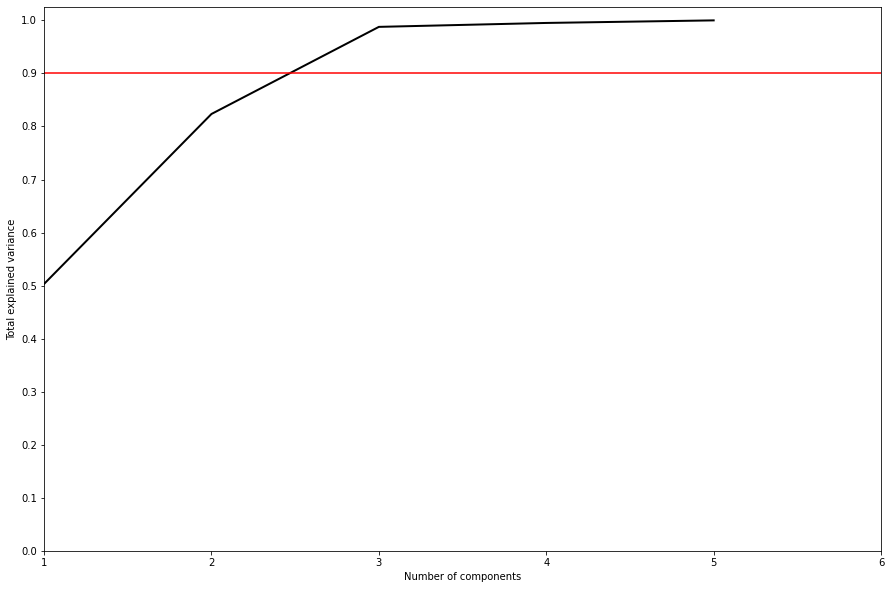

In [25]:
plt.plot(np.arange(1,6), np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(1, 6)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axhline(0.9, c='r')
plt.show()

In [252]:
print('Первые две главных компоненты сохраняют', str(round(100*pca.explained_variance_ratio_[:2].sum(),2))+'%', 
      'дисперсии, три компоненты -', str(round(100*pca.explained_variance_ratio_[:3].sum(),2))+'%')

Первые две главных компоненты сохраняют 82.35% дисперсии, три компоненты - 98.78%


---

С целью снижения размерности данных имеет смысл оставлять три главных компоненты. Однако, в нашей задаче и две главных компоненты выполняют свою задачу по разделению кластеров:

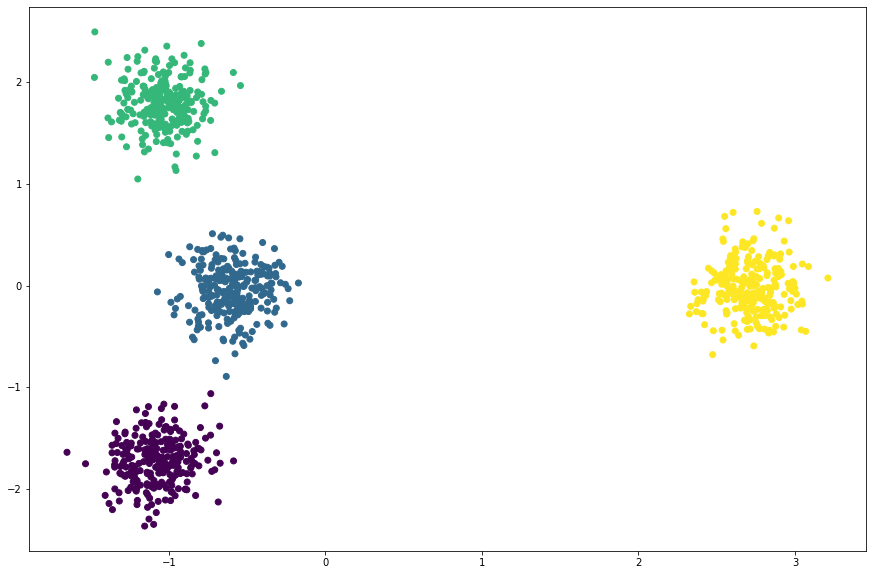

In [26]:
pca = PCA(n_components=2, random_state=21)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.show()

---

## t-SNE


---

Импортируем метод t-SNE:

In [27]:
from sklearn.manifold import TSNE

Обучим модели для двух компонент, с гиперпараметром ***perplexity*** равным 10 и 100 и визуализируем результаты:

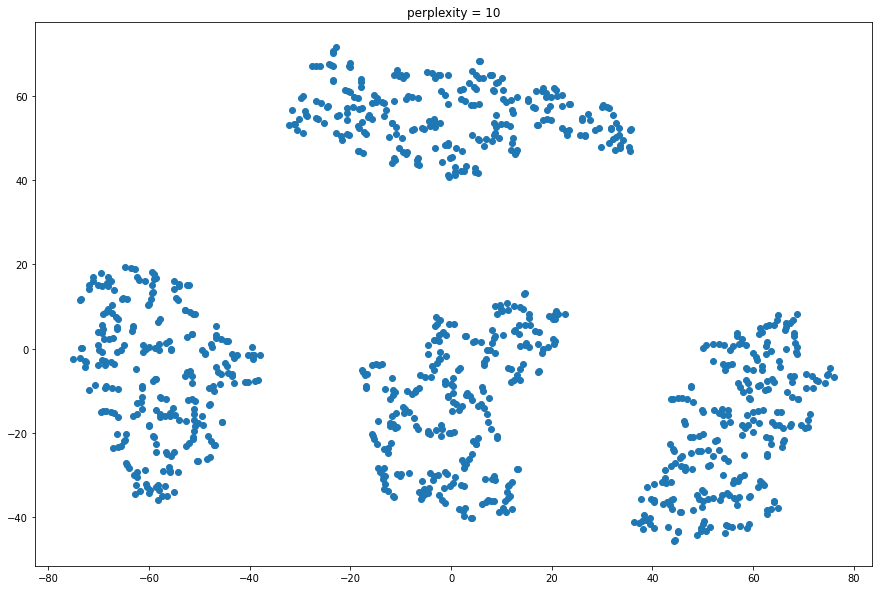

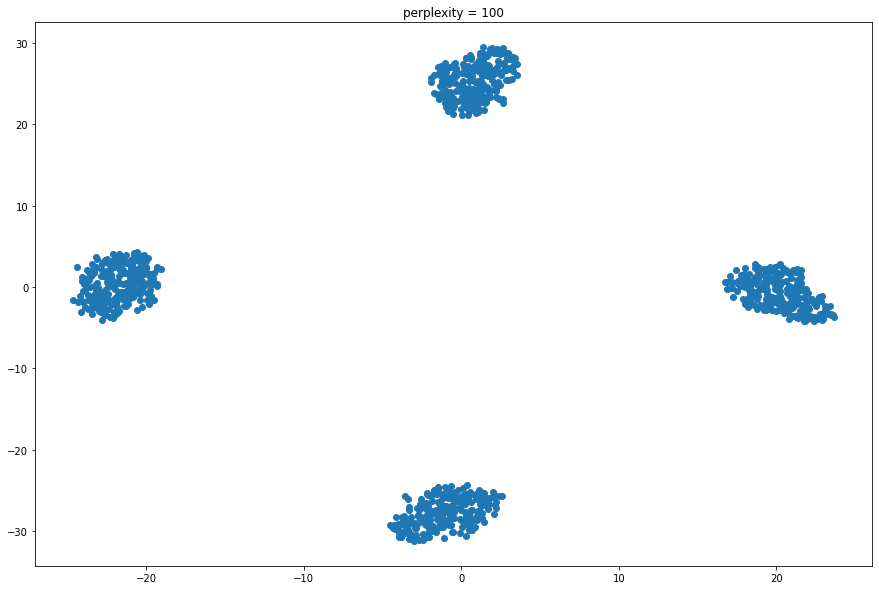

In [28]:
tsne = TSNE(n_components=2, perplexity=10, random_state=21)
tsne_representation = tsne.fit_transform(X)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.title('perplexity = 10')
plt.show()

tsne = TSNE(n_components=2, perplexity=100, random_state=21)
tsne_representation = tsne.fit_transform(X)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])
plt.title('perplexity = 100')
plt.show()

---

Увеличение параметра perplexity приводит к уменьшению расстояния между точками.

Визуализируем принадлежность к кластерам при двух компонентах и perplexity=25:

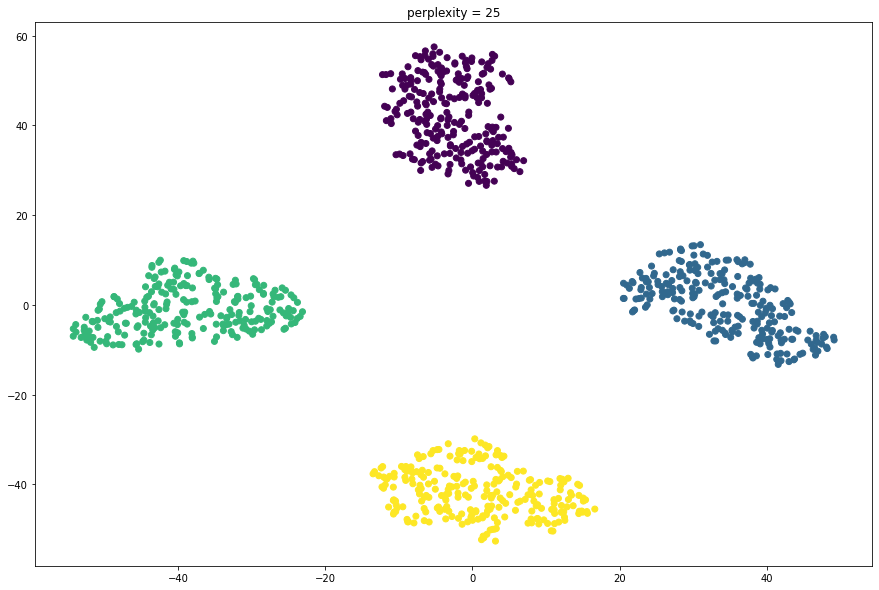

In [29]:
tsne = TSNE(n_components=2, perplexity=25, random_state=21)
tsne_representation = tsne.fit_transform(X)
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], c=y)
plt.title('perplexity = 25')
plt.show()

---

## DBSCAN


In [30]:
from sklearn.cluster import DBSCAN

---

Для отображения результатов на плоскости снизим размерность задачи с помощью t-SNE

In [31]:
tsne = TSNE(n_components=2, perplexity=15, random_state=21)
tsne_X = tsne.fit_transform(X)

---

Обучим модель с параметрами по умолчанию и напишем функцию визуализации результатов кластеризации:

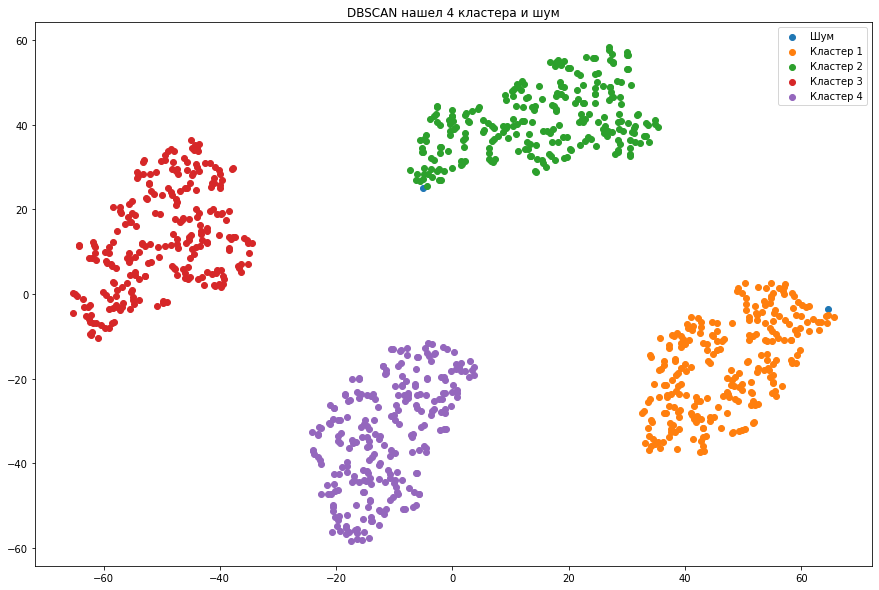

In [32]:
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X)

def viz_dbscan(labels, x2d):
    clstr = []
    k = labels.min()
    if k == -1:
        title = ['DBSCAN нашел ', ' кластера и шум']
    else:
        title = ['DBSCAN нашел ', ' кластера']
    for j in range(k, labels.max()+1):
        plt.scatter(x2d[labels==j, 0], x2d[labels==j, 1])
        if j == -1:
            clstr = ['Шум']
        else:
            clstr.append('Кластер '+str(j+1))
    plt.legend(clstr)
    plt.title(title[0] + str(len(clstr)+k) + title[1])
    plt.show()
    
viz_dbscan(dbscan.labels_, tsne_X)

---

Кластеры определены верно, но найден шум, который в принципе необходимо удалить. Попробуем изменить параметр ***eps*** модели. В этом нам поможет [NearestNeighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html). Установим количество ближайших соседей *n_neighbors=25*, это означает что в кластере должно быть не менее 25 объектов.

In [33]:
from sklearn.neighbors import NearestNeighbors

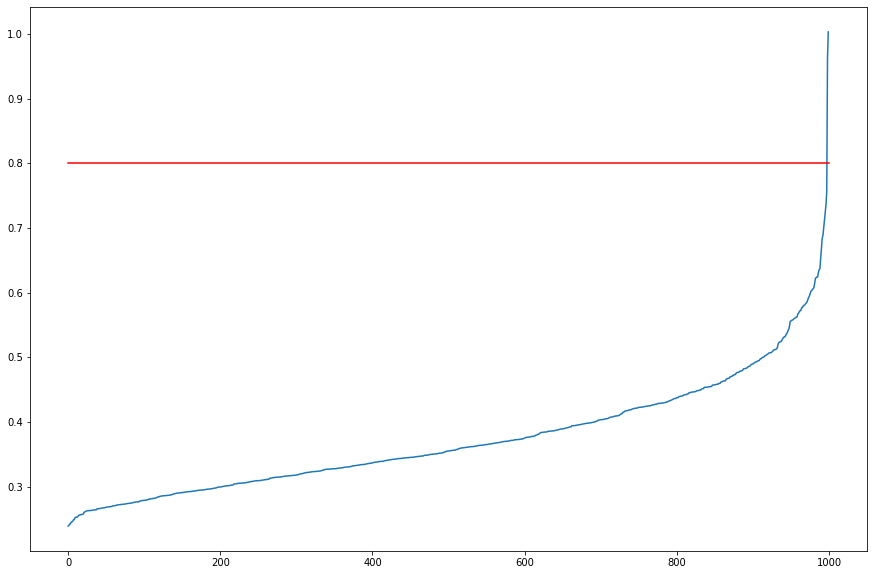

In [34]:
model_NN = NearestNeighbors(n_neighbors=25)
model_NN.fit(X)
dist, _ = model_NN.kneighbors(X, n_neighbors=25, return_distance=True)
dist = np.sort(dist[:,-1])
plt.plot(dist)
plt.plot([0,1000], [0.8, 0.8], 'r')
plt.show()

---

Параметр ***eps*** по оси ординат необходимо выбрать так, чтобы после пересечения прямой с графиком, график шел вертикально вверх. Построим модель с eps=0.8:

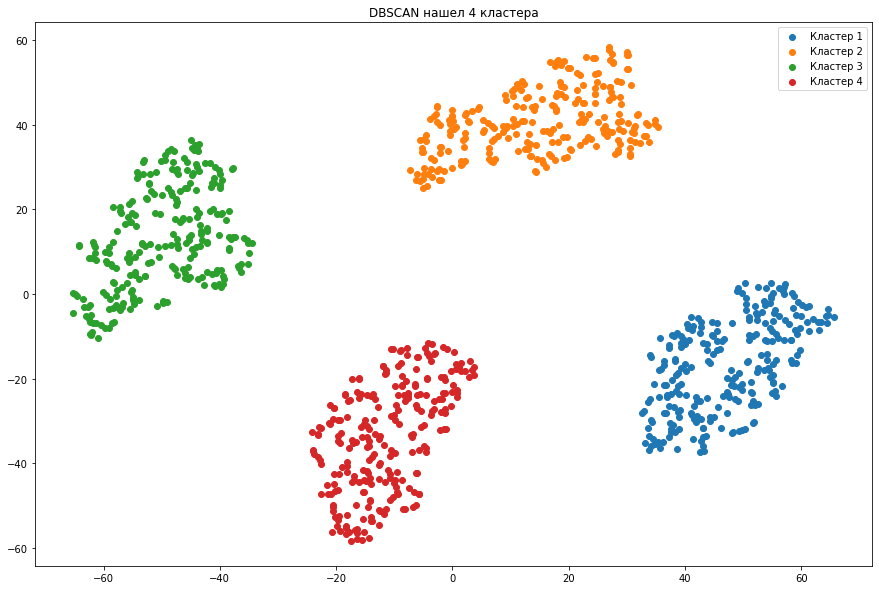

In [35]:
dbscan = DBSCAN(eps=0.8)
dbscan.fit(X)
viz_dbscan(dbscan.labels_, tsne_X)

---

DBSCAN верно определил кластеры и не нашел шума.

---

Оценим качество кластеризации:

In [36]:
for j in range(dbscan.labels_.max()+1):
    print('метка класса =', j, '   метка кластера =', dbscan.labels_[y==j].mean(), 
          '   стандартное отклонение меток кластера =', dbscan.labels_[y==j].std())

метка класса = 0    метка кластера = 0.0    стандартное отклонение меток кластера = 0.0
метка класса = 1    метка кластера = 1.0    стандартное отклонение меток кластера = 0.0
метка класса = 2    метка кластера = 3.0    стандартное отклонение меток кластера = 0.0
метка класса = 3    метка кластера = 2.0    стандартное отклонение меток кластера = 0.0


In [37]:
y_ac = np.full(y.shape, fill_value=np.nan)
for j in range(4):
     y_ac[y == j] = int(dbscan.labels_[y==j].mean())
print(classification_report(y_ac, dbscan.labels_))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       250
         1.0       1.00      1.00      1.00       250
         2.0       1.00      1.00      1.00       250
         3.0       1.00      1.00      1.00       250

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [38]:
m4['DBSCAN'] = metrics4(X, dbscan.labels_, y_ac)
m4

,KMeans,AgglomerativeClustering,DBSCAN
adjusted_rand_score,1.000000,1.000000,1.000000
silhouette_score,0.788662,0.788662,0.788662
calinski_harabasz_score,7103.301528,7103.301528,7103.301528
davies_bouldin_score,0.297722,0.297722,0.297722


---

Все методы показали одинаковые значения метрик качества кластеризации, в силу того, что продемонстрировали одинаковые результаты.

---

Можно посмотреть, при каких значениях eps сколько кластеров строит DBSCAN. Например, следующий код строит зависимость количества кластеров от eps, изменяющегося от 0.1 до 0.99:

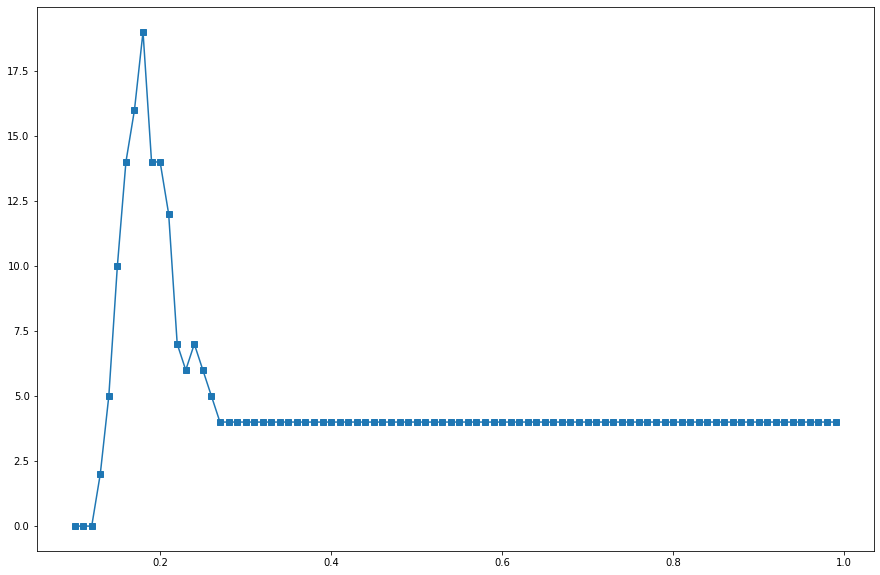

In [39]:
epsilon = []
n_claster = []
for j in range(10, 100, 1):
    dbscan = DBSCAN(eps=j/100)
    dbscan.fit(X)
    epsilon.append(j/100)
    n_claster.append(dbscan.labels_.max()+1)
plt.plot(epsilon, n_claster, marker='s')
plt.show()

---

И можно посмотреть, как DBSCAN разбивает наши данные на 19 кластеров (eps=0.18):

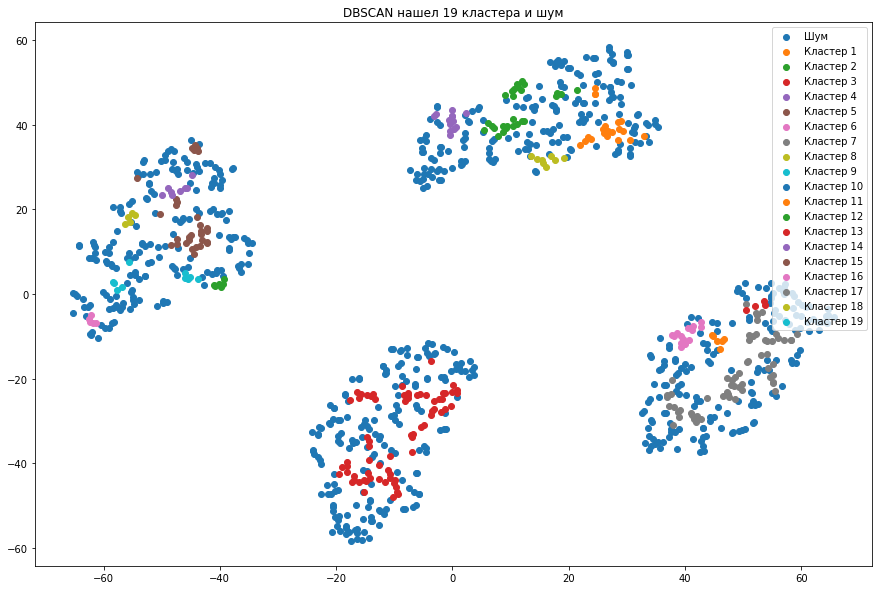

In [40]:
dbscan = DBSCAN(eps=0.18)
dbscan.fit(X)
viz_dbscan(dbscan.labels_, tsne_X)

---

Для оценки качества полученного разбиения не обязательно применять метрики, достаточно взглянуть на процент данных, определенных как шум:

In [41]:
print('DBSCAN определил', str(len(dbscan.labels_[dbscan.labels_==-1])/10) +'%', 'данных как шум')

DBSCAN определил 70.8% данных как шум


---
При ошибочном определении количества кластеров - очень много данных определены как шум => необходимо исправить ошибку, изменив количество кластеров